1026 

# Basic Syntax - 02

## computed property

### computed

**computed()

: 계산된 속성을 정의하는 함수
- 미리 계산된 속성을 사용하여 템플릿에서 표현식을 단순하게 하고 불필요한 반복 연산을 줄임

    반환되는 값은 computed ref. 일반 ref와 유사하게 계산된 결과를 .value로 참조할 수 있음. (템플릿에서는 .value 생략 가능)

    computed 속성은 의존된 반응형 데이터를 자동으로 추적(값이 바뀔때마다 갱신되어야하기 때문에)

    의존하는 데이터가 변경될 때만 재평가(예시에서, todos가 변경될 때만 restOfTodoes가 업데이트 됨.)

### computed vs method

computed 속성 대신 그냥 method로도 동일한 기능을 정의할 수 있음. 둘의 접근 방식은 실제로 완전히 동일함. 

**computed와 method의 차이**

computed 속성은 의존된 반응형 데이터를 기반으로 cached 됨- 의존하는 데이터가 변경된 경우에만 재평가- 의존된 반응형 데이터가 변경되지 않는 한 이전에 계산된 결과 즉시 반환.

method 호출은 랜더링 발생마다 항상 함수 실행.

**cache**

데이터나 결과를 일시적으로 저장해두는 임시 저장소. 이후 같은 데이터나 결과를 다시 계산하지 않고 빠르게 접근할 수 있도록 함.

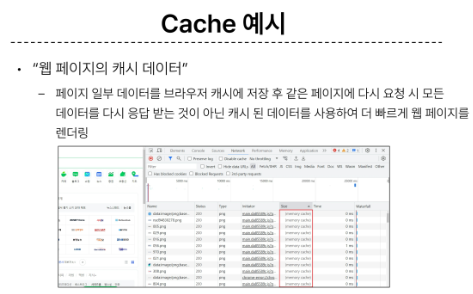

**computed와 method의 적절한 사용처**

- computed

    의존하는 데이터에 따라 결과가 바뀌는 계산된 속성을 만들 때. 동일한 의존성을 가진 여러 곳에서 사용할 때 계산 결과를 캐싱하여 중복 계산 방지.

- method

    단순히 특정 동작을 수행하는 함수를 정의할 때 사용. 데이터에 의존하는지 여부와 관계없이 항상 동일한 결과를 반환


**computed** - 의존된 데이터가 변경되면 자동으로 업데이트

**method** - 호출해야만 실행됨

--> 사용 목적과 상황에 맞게 적절히 조합하여 사용


In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <div id="app">
    <h2>남은 할 일</h2>
    <!-- <p> {{todos.length > 0 ? "아직 남았다" : "퇴근"}} </p> -->
    <!-- todos의 길이를 매번 평가할 것. -->
    <p> {{restOfTodos}} </p>
  </div>

  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref, computed } = Vue

    const app = createApp({
      setup() {
        const todos = ref([
          { text: 'Vue 실습' },
          { text: '자격증 공부' },
          { text: 'TIL 작성' }
        ])

        const restOfTodos = computed( () => {
          return todos.value.length > 0 ? "아직 남았다" : "퇴근~" 
        })

        return {
          todos,
          restOfTodos
        }
      }
    })

    app.mount('#app')
  </script>
</body>

</html>


## conditional rendering

### v-if

**v-if** : 표현식 값의 T/F를 기반으로 요소를 조건부로 렌더링

```
    <p v-if="isSeen">true일때 보여요</p>
    <p v-else>false일때 보여요</p>
    <button @click="isSeen = !isSeen">토글</button>

```

v-if는 directive이기 때문에 단일 요소에만 연결 가능. 이 경우 요소에 v-if를 사용하여 하나 이상의 요소에 대해 적용할 수 있음(v-else, v-else-if 모두 적용 가능.)

```
    <template v-if=" name === 'Cathy'">
      <div>Cathy입니다</div>
      <div>나이는 30살입니다</div>
    </template>

```

**HTML <template> element**

: 페이지가 로드될 때 랜더링 되지 않지만 JavaScript를 사용하여 나중에 문서에서 사용할 수 있도록 하는 HTML을 보유하기 위한 매커니즘. 보이지 않는 wrapper 역할


### v-if 와 v-show

**v-show** : 표현식 값의 T/F를 기반으로 요소의 가시성을 전환. 항상 렌더링되어 DOM에 남아있음. CSS display 속성만 전환하기 때문

v-if는 초기 조건이 false인 경우 아무 작업도 수행x. 토글 비용이 높음. 지우고 새로 랜더링해야 함. 실행 중 toggle 값이 크게 바뀌지 않는다면 v-if가 권장.

v-show는 초기 조건에 관계없이 일단 랜더링함. 그래서 초기 렌더링 비용이 더 높음. 토글이 자주 되는 요소일 경우 v-show가 더 권장됨.


In [ ]:
<!-- v-if v-show -->

<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <div id="app">
    <!-- if else -->
    <p v-if="isSeen">true일때 보여요</p>
    <!-- false로 평가 받았을 때 반대값은 랜더링조차 되지 않았음을 확인 -->
    <p v-else>false일때 보여요</p>
    <button @click="isSeen = !isSeen">토글</button>

    <!-- else if -->
    <!-- 조건에 맞지 않는 값은 랜더링되지 않음. 존재조차 x-->
    <div v-if="name === 'Alice'">Alice입니다</div>
    <div v-else-if="name === 'Bella'">Bella입니다</div>
    <div v-else-if="name === 'Cathy'">Cathy입니다</div>
    <div v-else>아무도 아닙니다.</div>

    <!-- v-if on <template> -->
    <!-- template 페이지가 로드될 때 랜더링x. 로직적인 부분을 활용하기 위해 사용. 최종 출력에는 관여하지x -->
    <template v-if=" name === 'Cathy'">
      <div>Cathy입니다</div>
      <div>나이는 30살입니다</div>
    </template>

    <!-- v-show -->
    <!-- v-show는 보여질지 말지를 결정. 랜더링은 되어 있음 css display 속성만 전환(none/) -->
    <div v-show="isShow">v-show</div>
  </div>

  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref } = Vue

    const app = createApp({
      setup() {
         const isSeen = ref(true)
         const name = ref("Cathy")
         const isShow = ref(false)
        return {
          isSeen,
          name,
          isShow
        }
      }
    })

    app.mount('#app')
  </script>
</body>

</html>


## list rendering

### v-for

**v-for** 소스 데이터를 기반으로 요소 또는 템플릿 블록을 여러 번 렌더링

소스 데이터: array, object, number, string, iterable

**v-for 구조**

alias in expression 형식의 특수 구문을 사용하여 반복되는 현재 요소에 대한 별칭(alias)을 제공.

인덱스(객체에서는 키)에 대한 별칭 지정 가능.
```
   <div v-for="(value, key, index) in myObj">
      {{ value }} // {{ key }}, {{ index }}      
    </div>
```

**여러 요소에 대한 v-for 적용**

```
   <ul>
      <!-- template tag는 랜더링되지 않음. 로직적인 부분을 담당하는 포장지. -->
      <template v-for="item in myArr">
      <li> {{item.name}} </li>
      <li> {{item.age}} </li>
      <hr>
      </template>
   </ul>
```

중첩해서도 적용 가능.

**반드시 v-for와 key를 함께 사용한다**

내부 컴포넌트의 상태를 일관되게 유지. 데이터의 예측 가능한 행동을 유지(vue 내부 동작 관련)

**v-for와 key**

key는 반드시 각 요소에 대한 고유한 값을 나타낼 수 있는 식별자여야 함

### v-for with v-if

**동일 요소에 v-for와 v-if를 함께 사용하지 않는다**

동일 요소에서 v-if가 v-for보다 우선순위가 더 높음-> v-if 조건은 v-for 범위의 변수에 접근할 수 없음.

해결 1: computed를 활용해 필터링 된 목록을 반환하여 반복하도록 설정

해결 2: v-for와 template요소를 사용하여 v-if를 이동


In [ ]:
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <div id="app">
    <!-- div 자체가 두 번 반복되는 것 확인 -->
    <div v-for="(item, index) in myArr">
      <!-- item이 객체이기때문에 안의 값은 chaining으로 추출 -->
      {{ index }} // {{ item.name }}
    </div>
    <hr>
    <!-- 순서가 있음. valye, key, index -->
    <div v-for="(value, key, index) in myObj">
      {{ value }} // {{ key }}, {{ index }}      
    </div>

    <!-- v-for on <template> -->
    <hr>

    <ul>
      <!-- template tag는 랜더링되지 않음. 로직적인 부분을 담당하는 포장지. -->
      <template v-for="item in myArr">
        <li> {{item.name}} </li>
        <li> {{item.age}} </li>
        <hr>
      </template>
    </ul>

    <!-- nested v-for -->
    <!-- 중첩 for문 사용 가능. -->
    <!-- 상위 요소에도 접근 가능. -->
    <ul v-for="item in myInfo">
      <!-- 정의되기 전에 사용 불가. -->
      <p> {{friend}} </p>
      <li v-for="friend in item.friends">
        {{ item.name }}'s friend : {{ friend }}
      </li>
    </ul>
    <!-- for문 안에서 사용 가능하지 상위 범위에서는 사용 불가. -->
    <p> {{friend}} </p>
  </div>

  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref } = Vue

    const app = createApp({
      setup() {
        // 배열 내 객체.
        const myArr = ref([
          { name: 'Alice', age: 20 },
          { name: 'Bella', age: 21 }
        ])
        const myObj = ref({
          name: 'Cathy',
          age: 30
        })

        // nested v-for
        const myInfo = ref([
          { name: 'Alice', age: 20, friends: ['Bella', 'Cathy', 'Dan'] },
          { name: 'Bella', age: 21, friends: ['Alice', 'Cathy'] }
        ])

        return {
          myArr,
          myObj,
          myInfo
        }
      }
    })

    app.mount('#app')
  </script>
</body>

</html>


In [ ]:
<!-- v-for와 key -->

<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <div id="app">
    <!-- Maintaining State with key -->
    <!-- v-vind로 key를 각각의 item에 id를 붙여줌.  
    vue의 내부적인 동작 중 문제가 생기지 않도록 
    key는 각각의 요소를 식별할 수 있는 요소여야 함.
    index는 안됨. index는 그 각각의 값에 대한 고유한 값이 x 
    사용자가 중간 요소를 지웠을 때 인덱스는 바뀌어버림. -->
    <div v-for="item in items" :key="item.id">
      <!-- content -->
      {{ item }}, {{item.id}}
    </div>
  </div>

  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref } = Vue

    const app = createApp({
      setup() {
        let id = 0

        const items = ref([
          { id: id++, name: 'Alice' },
          { id: id++, name: 'Bella' },
        ])

        return {
          items,
        }
      }
    })

    app.mount('#app')
  </script>
</body>

</html>


In [ ]:
<!-- v-if와 v-for 사용시 주의 -->
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <div id="app">
    <!-- [Bad] v-for with v-if -->
    <!-- is complted가 true인 것만 출력 -->
    <ul >
      <!-- TypeError: Cannot read properties of undefined (reading 'isComplete') -->
      <!-- v-if가 v-for보다 우선순위가 높음. v-if가 실행될 때 todo는 정의되지 않았음. -->

      <!-- <li v-for="todo in todos" v-if="!todo.isComplete" :key="todo.id"> -->
        <!-- {{todo.name}} -->
      </li>
    </ul>

    <!-- [Good] v-for with v-if & computed-->
    <!-- 해결 1: computed 활용 //조건에 맞는 배열을 먼저 계산해두기 -->
    <ul>
      <li v-for="todo in completeTodos" :key="todo.id">
        {{todo.name}}
      </li>
    </ul>

    <!-- [Good] v-for with v-if & template-->
    <!-- 해결 2: v-for과 v-if를 분할해서 template와 함께 활용 -->
    <ul>
      <template v-for="todo in todos" :key="todo.id">
        <li v-if="!todo.isComplete">
          {{todo.name}}
        </li>
      </template>
    </ul>


  </div>

  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref, computed } = Vue

    const app = createApp({
      setup() {
        let id = 0

        const todos = ref([
          { id: id++, name: '복습', isComplete: true },
          { id: id++, name: '예습', isComplete: false },
          { id: id++, name: '저녁식사', isComplete: true },
          { id: id++, name: '노래방', isComplete: false }
        ])

        const completeTodos = computed(() =>{
          // filter- 필터의 콜백함수의 return이 true인 것만 새로운 배열로 반환
          // map은 모든 요소에 대해 적용하여 새로운 배열을 만들어 반환
          return todos.value.filter((todo) => !todo.isComplete)
        })

        return {
          todos,
          completeTodos
        }
      }
    })

    app.mount('#app')
  </script>
</body>

</html>


## watchers

**watch()**

반응형 데이터를 감시하고, 감시하는 데이터가 변경되면 콜백 함수 호출

**watch 구조**

```
watch(variable, (newValue, oldValue) => {
    //do something
})
```
variable- 감시하는 변수

newValue- 감시하는 변수가 변화된 값. 콜백 함수의 첫번째 인자.

oldValue- 콜백 함수의 두번째 인자

computed와 비슷한데 다른 점?

감시하는 변수에 변화가 생겼을 때 어떤 다른 외부적인 로직 실행, 혹은 감시하는 변수의 변경된 값을 활용하기도 함. computed 처럼 계산된 값을 필요로 하는 것은 아님..

둘 다 데이터의 변화를 감시하고 처리한다는 공통점. 둘의 차이는 목적에 있음

computed는 값을 반환, watchers는 감시하고 작업을 수행함.
computed는 템플릿 내에서 사용되는 데이터 연산용. watchers는 데이터 변경에 따른 특정 작업 처리용.
computed- 연산 된 길이, 필터링 된 목록 계산 등.
watchers- 비동기 API요청, 연관 데이터 업데이트.

**computed와 watch 모두 의존(감시)하는 원본 데이터를 직접 변경하지 않음**


In [ ]:
<!-- computed와 watch -->

<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <div id="app">
    <!-- 1 -->
    <button @click="count++">Add 1</button>
    <p>Count: {{ count }}</p>

    <!-- 2 -->
    <input v-model="message">
    <!-- message가 변경될 때마다 그 길이값을 할당하겠다. -->
    <p>Message length: {{ messageLength }}</p>
  </div>

  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref, watch } = Vue

    const app = createApp({
      setup() {
        const count = ref(0)
        const message = ref('')
        const messageLength = ref(0)

        const countWatch = watch(count, (newValue, oldValue)=> {
            console.log(`newValue=${newValue}, oldValue=${oldValue}`)
        })

        const messageWatch = watch(message, (newValue, oldValue) =>{
          messageLength.value = newValue.length
        })
        // template에서 작성하려면 return에 작성.
        return {
          count,
          message,
          messageLength,
        }
      }
    })

    app.mount('#app')
  </script>
</body>

</html>


## lifecycle hooks

**Lifecycke Hooks**

Vue 인스턴스의 생애주기 동안 특정 시점에 실행되는 함수

-개발자가 특정 단계에서 의도하는 로직이 실행될 수 있게 함

**lifecycle hooks 특징**

vue는 lifecycle hooks에 등록된 콜백 함수들을 인스턴스와 자동으로 연결함.

이렇게 동작하려면 hooks 함수들은 반드시 동기적으로 작성되어야 함.

https://v3-docs.vuejs-korea.org/guide/essentials/lifecycle.html#lifecycle-hooks

onMounted, onUpdated, onUnMounted 등등

생명주기 훅

https://v3-docs.vuejs-korea.org/guide/essentials/lifecycle.html#lifecycle-diagram


In [ ]:
<!-- lifecycle hook -->

<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <div id="app">
    <button @click="count++">Add 1</button>
    <p>Count: {{ count }}</p>
    <p>{{ message }}</p>
  </div>

  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref, onMounted, onUpdated } = Vue

    const app = createApp({
      setup() {
        const count = ref(0)
        const message = ref(null)
        onMounted(() =>{
          // app이 mount될 때 호출됨.
          console.log("mounted")
        })
        onUpdated(() =>{
          message.value = "DOM updated"
          console.log("DOM updated")
        })
        return {
          count,
          message
        }
      },
    })

    app.mount('#app')

  </script>
</body>

</html>


In [ ]:
<!-- onMounted 예시 -->
<!DOCTYPE html>
<html lang="en">

<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Document</title>
</head>

<body>
  <!-- 사용자가 들어오자마자 고양이 이미지를 띄우고싶다-mount될 때 함수 호출 -->
  <div id="app">
    <button @click="getCatImage">냥냥펀치</button>
  </div>

  <script src="https://cdn.jsdelivr.net/npm/axios/dist/axios.min.js"></script>
  <script src="https://unpkg.com/vue@3/dist/vue.global.js"></script>
  <script>
    const { createApp, ref, onMounted } = Vue
    const URL = 'https://api.thecatapi.com/v1/images/search'

    const app = createApp({
      setup() {
        const getCatImage = function () {
          axios({
            method: 'get',
            url: URL,
          })
            .then((response) => {
              imgUrl = response.data[0].url
              return imgUrl
            })
            .then((imgData) => {
              imgElem = document.createElement('img')
              imgElem.setAttribute('src', imgData)
              document.body.appendChild(imgElem)
            })
            .catch((error) => {
              console.log('실패했다옹')
            })
        }
        onMounted(()=>{
          getCatImage()
        })

        return {
          getCatImage
        }
      }
    })

    app.mount('#app')
  </script>
</body>

</html>


## vue style guide

**v-for에 key 사용하기**

최고 우선순위!

https://v3-docs.vuejs-korea.org/style-guide/rules-essential.html#use-keyed-v-for


**v-if와 v-for 함께 사용하지 않기**

https://v3-docs.vuejs-korea.org/style-guide/rules-essential.html#use-keyed-v-for


스타일가이드 우선순위 document

https://v3-docs.vuejs-korea.org/style-guide/


**주의!! computed의 반환 값은 변경하지 말 것**

computed의 반환 값은 의존하는 데이터의 파생된 값.
일종의 snapshot이며 의존하는 데이터가 변경될 때 마다 새 snapshot 생성됨

snapshot을 변경하는것은 의미없음. 계산된 반환 값은 읽기전용으로 취급되어야. 대신 새 값을 얻기 위해서는 의존하는 데이터를 업데이트해야 함.

computed에서 reverse 및 sort 사용시 원본 배열을 변경하기때문에 복사본을 만들어서 진행해야 함
